<a href="https://colab.research.google.com/github/Otavio8888/simula-o_votos_pesquisa/blob/main/pesquisa_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !apt-get install -y libssl-dev


In [ ]:
# !pip install -q rpy2

In [ ]:
%load_ext rpy2.ipython


In [ ]:
%%R
#install.packages("readxl")
install.packages("e1071")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘proxy’

trying URL 'https://cran.rstudio.com/src/contrib/proxy_0.4-27.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/e1071_1.7-16.tar.gz'

The downloaded source packages are in
	‘/tmp/Rtmpta0Qou/downloaded_packages’


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
library(readxl)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [ ]:
%%R
path = "/content/drive/MyDrive/Servico_publico_02.xlsx"
# path = '/content/drive/MyDrive/trabalho_estatistica_2/Servico_publico_02.xlsx'

dados <- readxl::read_excel(path)
# dados <- read_excel(path) #
#nrow(dados)
#ncol(dados)

dados

# A tibble: 10,000 × 6
   Região     Área              Ocupação             Opinião        Renda Idade
   <chr>      <chr>             <chr>                <chr>          <dbl> <dbl>
 1 Catamarca  Educação          Funcionário público  Satisfatório    1.17    27
 2 Querétaro  Segurança pública Assalariado/Autônomo Insatisfatório  1.68    32
 3 Dalmácia   Saúde pública     Funcionário público  Indiferente     1.13    23
 4 Aquitânia  Saúde pública     Assalariado/Autônomo Insatisfatório  2.29    27
 5 Nortúmbria Saúde pública     Assalariado/Autônomo Péssimo         2.41    38
 6 Aquitânia  Saúde pública     Empresário           Péssimo         2.7     29
 7 Catamarca  Educação          Funcionário público  Indiferente     1.23    30
 8 Dalmácia   Infraestrutura    Aposentado           Excelente       1.1     24
 9 Dalmácia   Infraestrutura    Desempregado         Excelente       1.05    19
10 Dalmácia   Infraestrutura    Assalariado/Autônomo Satisfatório    1.17    19
# ℹ 9,990 more ro

# Parte 1 Summary

In [ ]:
%%R
summary(dados)


    Região              Área             Ocupação           Opinião         
 Length:10000       Length:10000       Length:10000       Length:10000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     Renda            Idade      
 Min.   : 1.000   Min.   :18.00  
 1st Qu.: 1.350   1st Qu.:23.00  
 Median : 1.880   Median :28.00  
 Mean   : 2.375   Mean   :28.57  
 3rd Qu.: 2.790   3rd Qu.:33.00  
 Max.   :35.700   Max.   :80.00  
 NA's   :28                      


In [ ]:
#%%R
# as.data.frame(tabela_pivot)
#t(tabela_pivot)


In [ ]:
%%R
tabela_pivot_regiao <- dados %>%
  group_by(Região) %>%
  summarise(Soma = n(), .groups = "drop") %>%
  pivot_wider(names_from = Região, values_from = Soma)

t(tabela_pivot_regiao)

           [,1]
Aqu          12
Aqui          2
Aquit        13
Aquitâ        8
Aquitânia  1176
Cat          30
Cata         25
Catam        28
Catama       32
Catamarca  4025
Dal          15
Dalm         12
Dalmá         7
Dalmác       10
Dalmácia   1751
Nor          11
Nort          6
Nortú         7
Nortúm       10
Nortúmbria 1603
Que           4
Quer          6
Queré         8
Querét        6
Querétaro  1167
NA           26


In [ ]:
%%R
tabela_pivot_area <- dados %>%
  group_by(Área) %>%
  summarise(Soma = n(), .groups = "drop") %>%
  pivot_wider(names_from = Área, values_from = Soma)

t(tabela_pivot_area)

                  [,1]
Edu                  9
Educ                14
Educa               17
Educaç               8
Educação          2206
Inf                 24
Infr                16
Infra                7
Infrae              16
Infraestrutura    2185
Saú                 20
Saúd                20
Saúde               45
Saúde pública     3028
Seg                 15
Segu                13
Segur               20
Segura              18
Segurança pública 2285
NA                  34


In [ ]:
%%R
tabela_pivot_ocupacao <- dados %>%
  group_by(Ocupação) %>%
  summarise(Soma = n(), .groups = "drop") %>%
  pivot_wider(names_from = Ocupação, values_from = Soma)

t(tabela_pivot_ocupacao)

                     [,1]
Apo                     8
Apos                   11
Apose                   6
Aposen                  5
Aposentado           1180
Ass                    39
Assa                   29
Assal                  32
Assala                 31
Assalariado/Autônomo 4862
Des                     8
Dese                   13
Desem                   8
Desemp                  7
Desempregado         1094
Emp                     6
Empr                    4
Empre                   6
Empres                  7
Empresário            820
Fun                    12
Func                    4
Funci                   7
Funcio                  7
Funcionário público  1153
Pro                     3
Prof                    5
Profi                   4
Profis                  3
Profissional liberal  595
NA                     31


In [ ]:
%%R
tabela_pivot_opniao <- dados %>%
  group_by(Opinião) %>%
  summarise(Soma = n(), .groups = "drop") %>%
  pivot_wider(names_from = Opinião, values_from = Soma)

t(tabela_pivot_opniao)

               [,1]
Exc               5
Exce             11
Excel             9
Excele            6
Excelente       980
Ind              11
Indi              7
Indif            15
Indife            7
Indiferente    1560
Ins              29
Insa             16
Insat            18
Insati           24
Insatisfatório 3783
Pés               7
Péss             15
Péssi            17
Péssim           14
Péssimo        2292
Sat               5
Sati              8
Satis             3
Satisf            9
Satisfatório   1123
NA               26


In [ ]:
# %%R
# tabela_pivot_renda <- dados %>%
#   group_by(Renda) %>%
#   summarise(Soma = n(), .groups = "drop") %>%
#   pivot_wider(names_from = Renda, values_from = Soma)
# t(tabela_pivot_renda)

In [ ]:
# %%R
# tabela_pivot_idade <- dados %>%
#   group_by(Idade) %>%
#   summarise(Soma = sum(Valor), .groups = "drop") %>%
#   pivot_wider(names_from = Idade, values_from = Soma)
# #t(tabela_pivot_idade)

# Parte 2 Valores Corrigidos, criando novo Dataframe


In [ ]:
%%R
dados_1 <- dados

In [ ]:
%%R
dados_1$Região[dados_1$Região %in% c("Aqu", "Aqui", "Aquit", "Aquitâ")] <- "Aquitânia"
dados_1$Região[dados_1$Região %in% c("Cat", "Cata", "Catam", "Catama")] <- "Catamarca"
dados_1$Região[dados_1$Região %in% c("Dal", "Dalm", "Dalmá", "Dalmác")] <- "Dalmácia"
dados_1$Região[dados_1$Região %in% c("Nor", "Nort", "Nortú", "Nortúm")] <- "Nortúmbria"
dados_1$Região[dados_1$Região %in% c("Que", "Quer", "Queré", "Querét")] <- "Querétaro"


In [ ]:
%%R
# Substituições de prefixos por nomes completos, direto na coluna Área
dados_1$Área[dados_1$Área %in% c("Edu", "Educ", "Educa", "Educaç")] <- "Educação"
dados_1$Área[dados_1$Área %in% c("Inf", "Infr", "Infra", "Infrae")] <- "Infraestrutura"
dados_1$Área[dados_1$Área %in% c("Saú", "Saúd", "Saúde")] <- "Saúde pública"
dados_1$Área[dados_1$Área %in% c("Seg", "Segu", "Segur", "Segura")] <- "Segurança pública"


In [ ]:
%%R
dados_1$Ocupação[dados_1$Ocupação %in% c("Apo", "Apos", "Apose", "Aposen")] <- "Aposentado"
dados_1$Ocupação[dados_1$Ocupação %in% c("Ass", "Assa", "Assal", "Assala")] <- "Assalariado/Autônomo"
dados_1$Ocupação[dados_1$Ocupação %in% c("Des", "Dese", "Desem", "Desemp")] <- "Desempregado"
dados_1$Ocupação[dados_1$Ocupação %in% c("Emp", "Empr", "Empre", "Empres")] <- "Empresário"
dados_1$Ocupação[dados_1$Ocupação %in% c("Fun", "Func", "Funci", "Funcio")] <- "Funcionário público"
dados_1$Ocupação[dados_1$Ocupação %in% c("Pro", "Prof", "Profi", "Profis")] <- "Profissional liberal"


In [ ]:
%%R
dados_1$Opinião[dados_1$Opinião %in% c("Exc", "Exce", "Excel", "Excele")] <- "Excelente"
dados_1$Opinião[dados_1$Opinião %in% c("Ind", "Indi", "Indif", "Indife")] <- "Indiferente"
dados_1$Opinião[dados_1$Opinião %in% c("Ins", "Insa", "Insat", "Insati")] <- "Insatisfatório"
dados_1$Opinião[dados_1$Opinião %in% c("Pés", "Péss", "Péssi", "Péssim")] <- "Péssimo"
dados_1$Opinião[dados_1$Opinião %in% c("Sat", "Sati", "Satis", "Satisf")] <- "Satisfatório"



In [ ]:
%%R
# dados_1 <- dados_1[!is.na(dados_1$Renda), ]
dados_1 <- na.omit(dados_1)


In [ ]:
%%R

dados_1

# A tibble: 9,855 × 6
   Região     Área              Ocupação             Opinião        Renda Idade
   <chr>      <chr>             <chr>                <chr>          <dbl> <dbl>
 1 Catamarca  Educação          Funcionário público  Satisfatório    1.17    27
 2 Querétaro  Segurança pública Assalariado/Autônomo Insatisfatório  1.68    32
 3 Dalmácia   Saúde pública     Funcionário público  Indiferente     1.13    23
 4 Aquitânia  Saúde pública     Assalariado/Autônomo Insatisfatório  2.29    27
 5 Nortúmbria Saúde pública     Assalariado/Autônomo Péssimo         2.41    38
 6 Aquitânia  Saúde pública     Empresário           Péssimo         2.7     29
 7 Catamarca  Educação          Funcionário público  Indiferente     1.23    30
 8 Dalmácia   Infraestrutura    Aposentado           Excelente       1.1     24
 9 Dalmácia   Infraestrutura    Desempregado         Excelente       1.05    19
10 Dalmácia   Infraestrutura    Assalariado/Autônomo Satisfatório    1.17    19
# ℹ 9,845 more row

In [ ]:
%%R
summary(dados_1)


    Região              Área             Ocupação           Opinião         
 Length:9855        Length:9855        Length:9855        Length:9855       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     Renda            Idade      
 Min.   : 1.000   Min.   :18.00  
 1st Qu.: 1.350   1st Qu.:23.00  
 Median : 1.880   Median :28.00  
 Mean   : 2.375   Mean   :28.57  
 3rd Qu.: 2.790   3rd Qu.:33.00  
 Max.   :35.700   Max.   :80.00  


  Frequência.Var1 Frequência.Freq Percentual.Var1 Percentual.Freq
1       Aquitânia            1197       Aquitânia           12.15
2       Catamarca            4090       Catamarca           41.50
3        Dalmácia            1778        Dalmácia           18.04
4      Nortúmbria            1615      Nortúmbria           16.39
5       Querétaro            1175       Querétaro           11.92


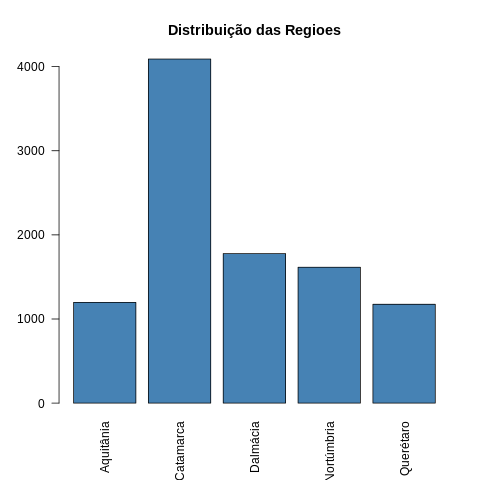

In [ ]:
%%R

# Área             Ocupação           Opinião
# Frequência absoluta
tabela_frequencia <- table(dados_1$Região)

# Frequência relativa (%)
tabela_percentual <- prop.table(tabela_frequencia) * 100

# Juntando em uma tabela
tabela_opniao <- data.frame(
  Frequência = tabela_frequencia,
  Percentual = round(tabela_percentual, 2)
)

print(tabela_opniao)

barplot(tabela_frequencia,
        main = "Distribuição das Regioes",
        col = "steelblue",
        las = 2)

    Frequência.Var1 Frequência.Freq   Percentual.Var1 Percentual.Freq
1          Educação            2226          Educação           22.59
2    Infraestrutura            2228    Infraestrutura           22.61
3     Saúde pública            3079     Saúde pública           31.24
4 Segurança pública            2322 Segurança pública           23.56


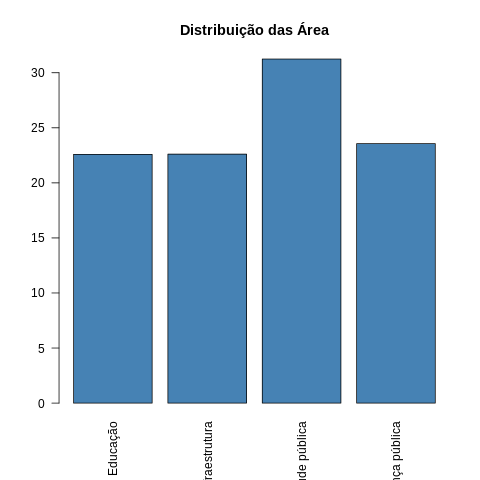

In [ ]:
%%R
# Area Total
# Ocupação           Opinião
# Frequência absoluta
tabela_frequencia <- table(dados_1$Área)

# Frequência relativa (%)
tabela_percentual <- prop.table(tabela_frequencia) * 100

# Juntando em uma tabela
tabela_opniao <- data.frame(
  Frequência = tabela_frequencia,
  Percentual = round(tabela_percentual, 2)
)

print(tabela_opniao)

barplot(tabela_percentual,
        main = "Distribuição das Área",
        col = "steelblue",
        las = 2)

       Frequência.Var1 Frequência.Freq      Percentual.Var1 Percentual.Freq
1           Aposentado            1200           Aposentado           12.18
2 Assalariado/Autônomo            4938 Assalariado/Autônomo           50.11
3         Desempregado            1112         Desempregado           11.28
4           Empresário             831           Empresário            8.43
5  Funcionário público            1171  Funcionário público           11.88
6 Profissional liberal             603 Profissional liberal            6.12


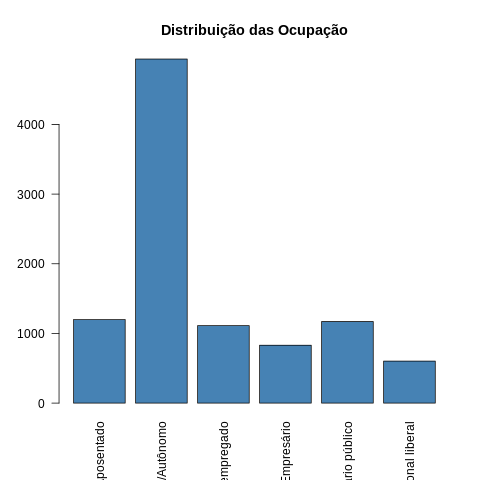

In [ ]:
%%R

# Frequência absoluta
tabela_frequencia <- table(dados_1$Ocupação)

# Frequência relativa (%)
tabela_percentual <- prop.table(tabela_frequencia) * 100

# Juntando em uma tabela
tabela_opniao <- data.frame(
  Frequência = tabela_frequencia,
  Percentual = round(tabela_percentual, 2)
)

print(tabela_opniao)

barplot(tabela_frequencia,
        main = "Distribuição das Ocupação",
        col = "steelblue",
        las = 2)

  Frequência.Var1 Frequência.Freq Percentual.Var1 Percentual.Freq
1       Excelente            1000       Excelente           10.15
2     Indiferente            1581     Indiferente           16.04
3  Insatisfatório            3820  Insatisfatório           38.76
4         Péssimo            2314         Péssimo           23.48
5    Satisfatório            1140    Satisfatório           11.57


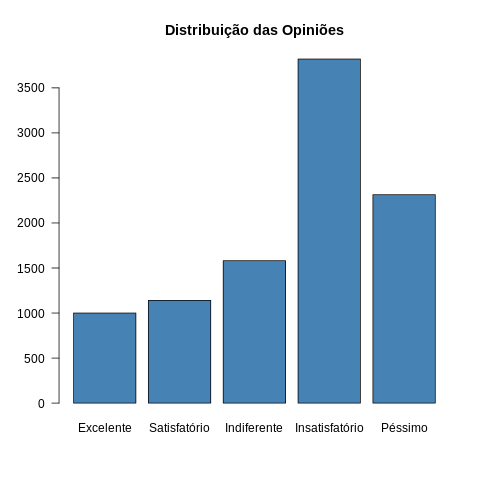

In [ ]:
%%R
# Frequência absoluta
tabela_frequencia <- table(dados_1$Opinião)

# Frequência relativa (%)
tabela_percentual <- prop.table(tabela_frequencia) * 100

# Juntando em uma tabela
tabela_opniao <- data.frame(
  Frequência = tabela_frequencia,
  Percentual = round(tabela_percentual, 2)
)

print(tabela_opniao)

barplot(tabela_frequencia[c(1, 5, 2, 3, 4)],
        main = "Distribuição das Opiniões",
        col = "steelblue",
        las = 1)

In [ ]:
%%R

tabela_frequencia[c(1, 5, 2, 3, 4)]

#


     Excelente   Satisfatório    Indiferente Insatisfatório        Péssimo 
          1000           1140           1581           3820           2314 


In [ ]:
%%R

x <- as.numeric(as.character(dados_1$Renda))
# x <- as.numeric(as.character(dados_1$Renda))
# x <- as.numeric(dados_1$Renda)
# x <- dados_1$Renda

# Medidas de tendência central e dispersão
media <- mean(x, na.rm = TRUE)
mediana <- median(x, na.rm = TRUE)
moda <- names(which.max(table(x)))
desvio_padrao <- sd(x, na.rm = TRUE)
variancia <- var(x, na.rm = TRUE)
coef_var <- sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE) * 100
assimetria <- e1071::skewness(x, na.rm = TRUE)
curtose <- e1071::kurtosis(x, na.rm = TRUE)

# Resultados
cat("Média:", media, "\n")
cat("Mediana:", mediana, "\n")
cat("Moda:", moda, "\n")
cat("Desvio padrão:", desvio_padrao, "\n")
cat("Coef. de variação (%):", coef_var, "\n")
cat("Assimetria:", assimetria, "\n")
cat("Curtose:", curtose, "\n")

Média: 2.375157 
Mediana: 1.88 
Moda: 1.05 
Desvio padrão: 1.71217 
Coef. de variação (%): 72.08661 
Assimetria: 5.19056 
Curtose: 59.93493 


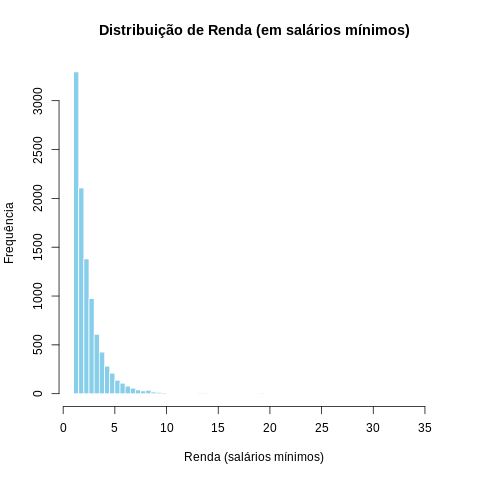

In [ ]:
%%R
hist(x,
     breaks = 50,        # número de faixas (pode ajustar)
     main = "Distribuição de Renda (em salários mínimos)",
     xlab = "Renda (salários mínimos)",
     ylab = "Frequência",
     col = "skyblue",
     border = "white")

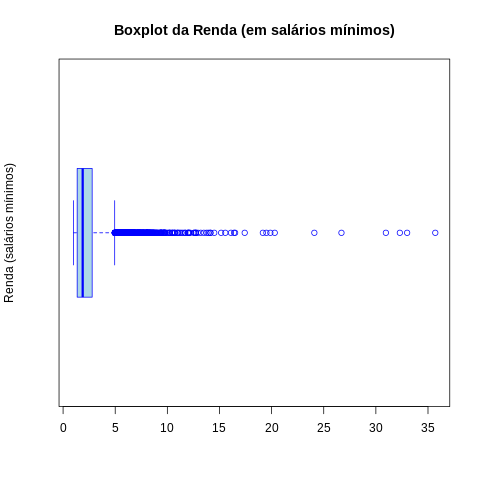

In [ ]:
%%R
boxplot(x,
        main = "Boxplot da Renda (em salários mínimos)",
        ylab = "Renda (salários mínimos)",
        col = "lightblue",
        border = "blue",
        horizontal = TRUE)


In [ ]:
%%R
# Calcular Q1, Q3 e IQR
Q1 <- quantile(x, 0.25, na.rm = TRUE)
Q3 <- quantile(x, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Calcular o limite superior
limite_superior <- Q3 + 1.5 * IQR

# Contar os casos acima do limite superior
casos_acima <- sum(x > limite_superior, na.rm = TRUE)

# Exibir o resultado
casos_acima


[1] 591


In [ ]:
%%R
x_idade <- as.numeric(dados_1$Idade)

# Medidas de tendência central e dispersão
media <- mean(x_idade, na.rm = TRUE)
mediana <- median(x_idade, na.rm = TRUE)
moda <- names(which.max(table(x)))
desvio_padrao <- sd(x_idade, na.rm = TRUE)
variancia <- var(x_idade, na.rm = TRUE)
coef_var <- sd(x_idade, na.rm = TRUE) / mean(x_idade, na.rm = TRUE) * 100
assimetria <- e1071::skewness(x_idade, na.rm = TRUE)
curtose <- e1071::kurtosis(x_idade, na.rm = TRUE)

Q1 <- quantile(x_idade, 0.25, na.rm = TRUE)
Q3 <- quantile(x_idade, 0.75, na.rm = TRUE)

# Resultados
cat("Média:", media, "\n")
cat("Mediana:", mediana, "\n")
cat("Moda:", moda, "\n")
cat("Desvio padrão:", desvio_padrao, "\n")
cat("Coef. de variação (%):", coef_var, "\n")
cat("Assimetria:", assimetria, "\n")
cat("Curtose:", curtose, "\n")

cat("Q1:", Q1, "\n")
cat("Q3:", Q3, "\n")


Média: 28.5653 
Mediana: 28 
Moda: 1.05 
Desvio padrão: 7.161818 
Coef. de variação (%): 25.07174 
Assimetria: 1.130964 
Curtose: 4.688699 
Q1: 23 
Q3: 33 


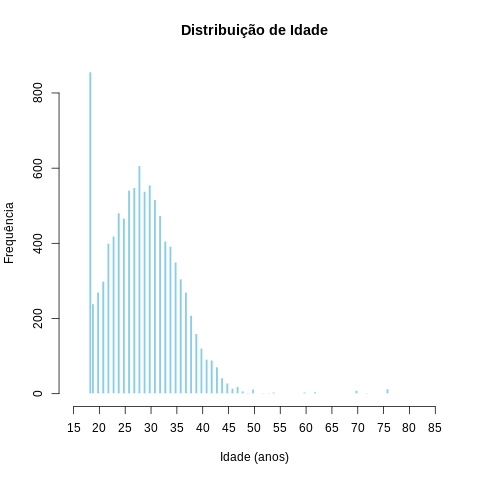

In [ ]:
%%R

hist(x_idade,
     breaks = 100,
     main = "Distribuição de Idade", xlab = "Idade (anos)", ylab = "Frequência", col = "skyblue", border = "white", xlim = c(15, 85), xaxt = "n")
axis(1, at = seq(15, 85, by = 5))
#hist(x_idade, breaks = 10,        # número de faixas (pode ajustar)
#     main = "Distribuição de Renda (em salários mínimos)", xlab = "Renda (salários mínimos)", ylab = "Frequência", col = "skyblue", border = "white")

## 2.8



    Frequência.Var1 Frequência.Freq   Percentual.Var1 Percentual.Freq
1          Educação            2226          Educação           22.59
2    Infraestrutura            2228    Infraestrutura           22.61
3     Saúde pública            3079     Saúde pública           31.24
4 Segurança pública            2322 Segurança pública           23.56


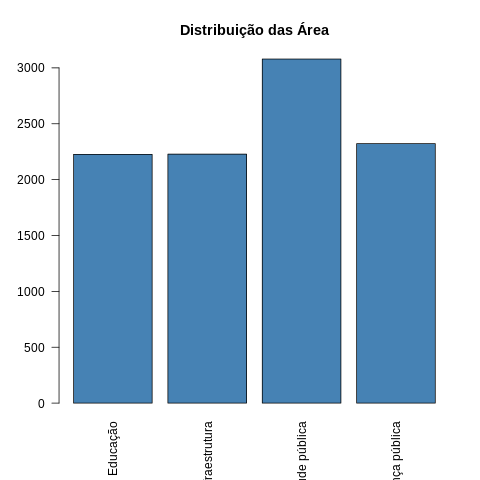

In [ ]:
%%R

# Ocupação           Opinião
# Frequência absoluta
tabela_frequencia <- table(dados_1[]$Área)

# Frequência relativa (%)
tabela_percentual <- prop.table(tabela_frequencia) * 100

# Juntando em uma tabela
tabela_opniao <- data.frame(
  Frequência = tabela_frequencia,
  Percentual = round(tabela_percentual, 2)
)

print(tabela_opniao)

barplot(tabela_frequencia,
        main = "Distribuição das Área",
        col = "steelblue",
        las = 2)

In [ ]:
%%R

# Frequência relativa
frequencia_relativa <- prop.table(table(x_idade)) * 100

# Frequência absoluta
frequencia_absoluta <- table(x_idade)

# Frequência acumulada
frequencia_acumulada <- cumsum(frequencia_relativa)

# Montar o data.frame completo
tabela_completa <- data.frame(
  Idade = as.numeric(names(frequencia_relativa)),
  Frequencia_Absoluta = as.vector(frequencia_absoluta),
  Frequencia_Relativa = round(as.vector(frequencia_relativa), 2),
  Frequencia_Acumulada = round(as.vector(frequencia_acumulada), 2)
)

# Exibir o resultado
tabela_completa


   Idade Frequencia_Absoluta Frequencia_Relativa Frequencia_Acumulada
1     18                 856                8.69                 8.69
2     19                 239                2.43                11.11
3     20                 270                2.74                13.85
4     21                 299                3.03                16.88
5     22                 400                4.06                20.94
6     23                 419                4.25                25.20
7     24                 481                4.88                30.08
8     25                 467                4.74                34.81
9     26                 541                5.49                40.30
10    27                 548                5.56                45.87
11    28                 607                6.16                52.02
12    29                 538                5.46                57.48
13    30                 555                5.63                63.12
14    31            

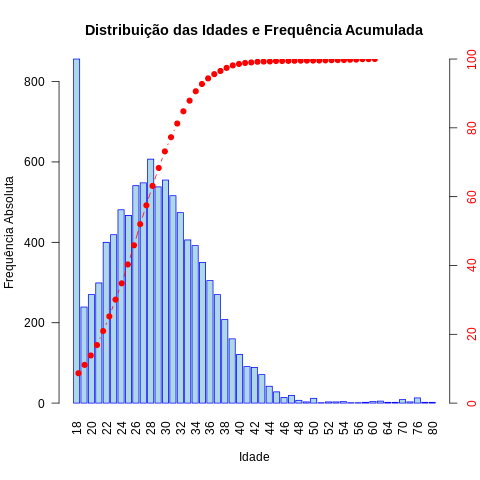

In [ ]:
%%R

# Primeiro o barplot da frequência absoluta
barplot(tabela_completa$Frequencia_Absoluta,
        names.arg = tabela_completa$Idade,
        col = "lightblue",
        main = "Distribuição das Idades e Frequência Acumulada",
        xlab = "Idade",
        ylab = "Frequência Absoluta",
        border = "blue",
        las = 2)

# Adicionar a linha da frequência acumulada (em %)
lines(x = 1:length(tabela_completa$Idade),
      y = tabela_completa$Frequencia_Acumulada * max(tabela_completa$Frequencia_Absoluta) / 100,
      type = "b",
      pch = 19,
      col = "red")

# Adicionar um eixo secundário para a frequência acumulada
axis(side = 4, at = seq(0, max(tabela_completa$Frequencia_Absoluta), length.out = 6),
     labels = round(seq(0, 100, length.out = 6)), col.axis = "red")
mtext("Frequência Acumulada Relativa (%)", side = 4, line = 3, col = "red")



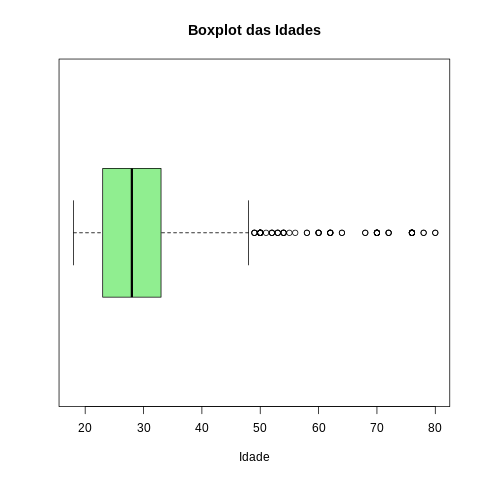

In [ ]:
%%R

boxplot(x_idade,
        horizontal = TRUE,
        col = "lightgreen",
        main = "Boxplot das Idades",
        xlab = "Idade")

# Parte 3, Análise em Conjunto de Duas Variáveis


### parte 3 exercicio 9.

In [ ]:
%%R
areas <- sort(unique(dados_1$Área))
niveis_opiniao <- c("Excelente", "Satisfatório", "Indiferente", "Insatisfatório", "Péssimo")
lista_freqs <- list()
for (area in areas) {
  sub <- subset(dados_1, Área == area)
  tabela <- table(factor(sub$Opinião, levels = niveis_opiniao))
  freq_rel <- round(tabela / sum(tabela), 3)
  lista_freqs[[area]] <- freq_rel
}
tabela_completa <- data.frame(Opinião = niveis_opiniao)
for (area in areas) {
  tabela_completa[[area]] <- lista_freqs[[area]]
}
print(tabela_completa, row.names = FALSE)

# total_seguranca <- sum(tabela_frequencia_1)
# total_saude     <- sum(tabela_frequencia_2)
# freq_relativa_seguranca <- round(tabela_frequencia_1 / total_seguranca, 2)
# freq_relativa_saude     <- round(tabela_frequencia_2 / total_saude, 2)
# tabela_completa <- data.frame(
#   opiniao                = names(tabela_frequencia_1),
#   seguranca              = as.vector(tabela_frequencia_1),
#   freq_seguranca         = as.vector(freq_relativa_seguranca),
#   saude                  = as.vector(tabela_frequencia_2),
#   freq_saude             = as.vector(freq_relativa_saude)
# )
# print(tabela_completa)


## tabela_frequencia_1 <- table(subset(dados_1, Área == 'Segurança pública')$Opinião)
## tabela_frequencia_2 <- table(subset(dados_1, Área == 'Saúde pública')$Opinião)
## tabela_frequencia_3 <- table(subset(dados_1, Área %in% c('Saúde pública', 'Segurança pública'))$Opinião)
## freq_relativa = tabela_frequencia_3/sum(tabela_frequencia_3)
## part3_8_tabela_completa <- data.frame(
##   opiniao    = names(tabela_frequencia_1),
##   seguranca = as.vector(tabela_frequencia_1),
##   #saudade   = as.vector(tabela_frequencia_2),
##   saude   = as.vector(tabela_frequencia_2),
##   total     = as.vector(tabela_frequencia_3),
##   freq_relativa = as.vector(round(freq_relativa, 2)))
## print(part3_8_tabela_completa[c(1,5,2,3,4), ])
#print(as.vector(tabela_frequencia_1))
#print(tabela_frequencia_2[1:5])
#print(tabela_frequencia_3[1:5
#print(tabela_frequencia_2)
# print(tabela_frequencia_3)
#tabela_frequencia
  #Frequencia_Absoluta = as.vector(frequencia_absoluta),
  #Frequencia_Relativa = round(as.vector(frequencia_relativa), 2),
  #Frequencia_Acumulada = round(as.vector(frequencia_acumulada), 2))
#print(sum(tabela_frequencia_3))
# new_array <- c("insatisfatorio|Pessimo", t(part3_8_tabela_completa[3, 2:4] + part3_8_tabela_completa[4, 2:4]))
# part3_8_tabela_plus <- rbind(
#   part3_8_tabela_completa,
#   new_array)
# part3_8_tabela_plus
# # Exibir o resultado
# #part3_8_tabela_completa

        Opinião Educação Infraestrutura Saúde pública Segurança pública
      Excelente    0.079          0.338         0.003             0.026
   Satisfatório    0.153          0.246         0.017             0.086
    Indiferente    0.237          0.208         0.062             0.171
 Insatisfatório    0.450          0.193         0.382             0.522
        Péssimo    0.081          0.014         0.536             0.195


In [ ]:
%%R

areas <- sort(unique(dados_1$Área))
niveis_opiniao <- c("Excelente", "Satisfatório", "Indiferente", "Insatisfatório", "Péssimo")
lista_freqs <- list()

# Cria tabela cruzada: Opinião x Área
tabela_cruzada <- table(dados_1$Opinião, dados_1$Área)

# Reorganiza os níveis para manter a ordem desejada
tabela_cruzada <- tabela_cruzada[niveis_opiniao, areas]

# Frequência relativa por linha (i.e., para cada opinião)
freq_rel_por_linha <- round(prop.table(tabela_cruzada, margin = 1), 3)

# Converte para data frame para visualização
tabela_por_linha <- as.data.frame.matrix(freq_rel_por_linha)

# Adiciona coluna com o nome da Opinião
tabela_por_linha$Opinião <- rownames(tabela_por_linha)

# Reorganiza colunas (Opinião primeiro)
tabela_por_linha <- tabela_por_linha[, c("Opinião", areas)]

# Visualiza a tabela
print(tabela_por_linha, row.names = FALSE)


        Opinião Educação Infraestrutura Saúde pública Segurança pública
      Excelente    0.176          0.753         0.010             0.061
   Satisfatório    0.298          0.482         0.046             0.175
    Indiferente    0.334          0.293         0.121             0.251
 Insatisfatório    0.262          0.113         0.308             0.318
        Péssimo    0.078          0.014         0.713             0.195


In [ ]:
%%R

tabela_frequencia_1 <- table(subset(dados_1, Opinião == 'Insatisfatório')$Área)
tabela_frequencia_2 <- table(subset(dados_1, Opinião == 'Péssimo')$Área)
tabela_frequencia_3 <- table(subset(dados_1, Opinião %in% c('Péssimo', 'Insatisfatório'))$Área)

freq_relativa = tabela_frequencia_3/sum(tabela_frequencia_3)

part3_8_tabela_completa <- data.frame(
  opniao    = names(tabela_frequencia_1),
  seguranca = as.vector(tabela_frequencia_1),
  saudade   = as.vector(tabela_frequencia_2),
  total     = as.vector(tabela_frequencia_3),
  freq_relativa = as.vector(round(freq_relativa, 2))
)

part3_8_tabela_completa

             opniao seguranca saudade total freq_relativa
1          Educação      1002     180  1182          0.19
2    Infraestrutura       430      32   462          0.08
3     Saúde pública      1175    1650  2825          0.46
4 Segurança pública      1213     452  1665          0.27


### parte 3 exercicio 9.

In [ ]:
%%R
valores_opiniao <- c("Excelente" = 5, "Satisfatório" = 4, "Indiferente" = 3, "Insatisfatório" = 2, "Péssimo" = 1)
dados_1$opiniao_numerica <- valores_opiniao[as.character(dados_1$Opinião)]
medias_por_area <- aggregate(opiniao_numerica ~ Área, data = dados_1, FUN = mean)
medias_por_area <- medias_por_area[order(medias_por_area$opiniao_numerica), ]
print(medias_por_area)


               Área opiniao_numerica
3     Saúde pública         1.569990
4 Segurança pública         2.226529
1          Educação         2.699012
2    Infraestrutura         3.700628


# Parte 4

In [ ]:
!pip install -q rpy2


In [ ]:
%%R
# tabela_ocup_area <- table(dados_1$Ocupação, dados_1$Área)
# print(tabela_ocup_area)
# QUESTÃO 11 - QUESTAO 11
dados_1$Opinião <- factor(dados_1$Opinião, levels = c("Excelente", "Satisfatório", "Indiferente", "Insatisfatório", "Péssimo"))
tabela_ocup_opiniao <- table(dados_1$Ocupação, dados_1$Opinião)
print(tabela_ocup_opiniao)
proporcao_ocup_opiniao <- prop.table(tabela_ocup_opiniao, margin = 1)
print(round(proporcao_ocup_opiniao, 2))

                      
                       Excelente Satisfatório Indiferente Insatisfatório
  Aposentado                 257          333         311            294
  Assalariado/Autônomo        66          273         719           2742
  Desempregado               597          306         148             60
  Empresário                   0            1           2             93
  Funcionário público         80          226         396            439
  Profissional liberal         0            1           5            192
                      
                       Péssimo
  Aposentado                 5
  Assalariado/Autônomo    1138
  Desempregado               1
  Empresário               735
  Funcionário público       30
  Profissional liberal     405
                      
                       Excelente Satisfatório Indiferente Insatisfatório
  Aposentado                0.21         0.28        0.26           0.24
  Assalariado/Autônomo      0.01         0.06        0.15

In [ ]:
%%R
perfil_desejado <- dados_1 %>%
# QUESTÃO 17 A - QUESTAO 17 a)
#filter(Região == "Aquitânia", Ocupação %in% c("Assalariado/Autônomo"), Renda <= 3)
# QUESTÃO 17 B - QUESTAO 17 b)
#filter(Área == "Infraestrutura", Ocupação %in% c("Desempregado"), Idade < 30)
# QUESTÃO 17 C - QUESTAO 17 c)
filter(Ocupação %in% c("Profissional liberal", "Empresário"), Renda > 3, Idade >= 40)
tabela_opinioes <- table(perfil_desejado$Opinião)
print(tabela_opinioes)
moda_opiniao <- names(tabela_opinioes)[which.max(tabela_opinioes)]
print(paste("A opinião mais frequente para este perfil seria:", moda_opiniao))
proporcao_opinioes <- prop.table(tabela_opinioes)
print(proporcao_opinioes)


     Excelente   Satisfatório    Indiferente Insatisfatório        Péssimo 
             0              0              0              0            152 
[1] "A opinião mais frequente para este perfil seria: Péssimo"

     Excelente   Satisfatório    Indiferente Insatisfatório        Péssimo 
             0              0              0              0              1 




======= Região: Aquitânia =======
[1] "Frequência absoluta:"
                      Opinião
Ocupação             Excelente Satisfatório Indiferente Insatisfatório
  Aposentado                   0            0           1             15
  Assalariado/Autônomo         0            0           5            493
  Desempregado                 0            0           0              1
  Empresário                   0            0           0             31
  Funcionário público          0            2           0             27
  Profissional liberal         0            0           0             70
                      Opinião
Ocupação             Péssimo
  Aposentado                 1
  Assalariado/Autônomo     369
  Desempregado               0
  Empresário                82
  Funcionário público       11
  Profissional liberal      89
[1] "Proporção por ocupação:"
                      Opinião
Ocupação             Excelente Satisfatório Indiferente Insatisfatório
  Aposentado          

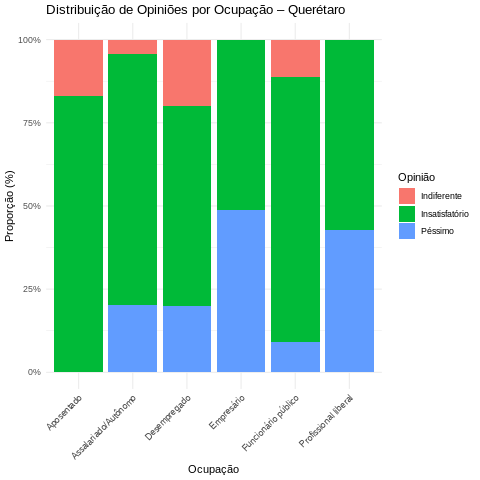

In [ ]:
%%R
library(ggplot2)
library(scales)
dados_1$Opinião <- factor(dados_1$Opinião, levels = c("Excelente", "Satisfatório", "Indiferente", "Insatisfatório", "Péssimo"))
dados_1$Ocupação <- factor(dados_1$Ocupação)
dados_1$Região <- factor(dados_1$Região)
regioes <- levels(dados_1$Região)
for (r in regioes) {
  cat("\n\n======= Região:", r, "=======\n")
  dados_r <- subset(dados_1, Região == r)
  freq <- xtabs(~ Ocupação + Opinião, data = dados_r)
  print("Frequência absoluta:")
  print(freq)
  proporcao <- prop.table(freq, margin = 1)
  print("Proporção por ocupação:")
  print(round(proporcao, 2))
}
dados_r <- subset(dados_1, Região == "Querétaro")
print(
  ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = percent_format()) +
    labs(title = "Distribuição de Opiniões por Ocupação – Querétaro",
         y = "Proporção (%)", x = "Ocupação") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
)
# %%R
# dados_1$Opinião <- factor(dados_1$Opinião, levels = c("Excelente", "Satisfatório", "Indiferente", "Insatisfatório", "Péssimo"))
# dados_1$Ocupação <- factor(dados_1$Ocupação)
# dados_1$Região <- factor(dados_1$Região)
# regioes <- levels(dados_1$Região)
# for (r in regioes) {
#   cat("\n\n======= Região:", r, "=======\n")
#   dados_r <- subset(dados_1, Região == r)
#   freq <- xtabs(~ Ocupação + Opinião, data = dados_r)
#   print("Frequência absoluta:")
#   print(freq)
#   proporcao <- prop.table(freq, margin = 1)
#   print("Proporção por ocupação:")
#   print(round(proporcao, 2))
# }
# dados_r <- subset(dados_1, Região == "Aquitânia")
# ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
#   geom_bar(position = "fill") +
#   scale_y_continuous(labels = scales::percent_format()) +
#   labs(title = "Distribuição de Opiniões por Ocupação – Aquitânia",
#        y = "Proporção (%)", x = "Ocupação") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))
# dados_r <- subset(dados_1, Região == "Catamarca")
# ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
#   geom_bar(position = "fill") +
#   scale_y_continuous(labels = scales::percent_format()) +
#   labs(title = "Distribuição de Opiniões por Ocupação – Catamarca",
#        y = "Proporção (%)", x = "Ocupação") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))
# dados_r <- subset(dados_1, Região == "Dalmácia")
# ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
#   geom_bar(position = "fill") +
#   scale_y_continuous(labels = scales::percent_format()) +
#   labs(title = "Distribuição de Opiniões por Ocupação – Dalmácia",
#        y = "Proporção (%)", x = "Ocupação") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))
# dados_r <- subset(dados_1, Região == "Nortúmbria")
# ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
#   geom_bar(position = "fill") +
#   scale_y_continuous(labels = scales::percent_format()) +
#   labs(title = "Distribuição de Opiniões por Ocupação – Nortúmbria",
#        y = "Proporção (%)", x = "Ocupação") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))
# dados_r <- subset(dados_1, Região == "Querétaro")
# ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
#   geom_bar(position = "fill") +
#   scale_y_continuous(labels = scales::percent_format()) +
#   labs(title = "Distribuição de Opiniões por Ocupação – Querétaro",
#        y = "Proporção (%)", x = "Ocupação") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1))

[1] "Tabela de Frequências e Proporções das Opiniões dos Jovens:"
# A tibble: 5 × 3
  Opinião        Frequência Proporcao
  <fct>               <int>     <dbl>
1 Excelente             876    0.255 
2 Satisfatório          746    0.217 
3 Indiferente           809    0.236 
4 Insatisfatório        893    0.260 
5 Péssimo               107    0.0312


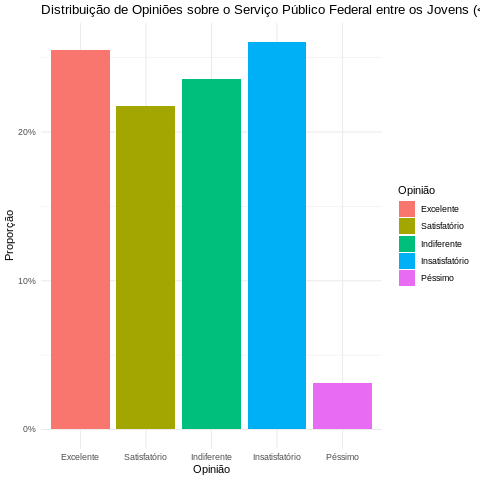

In [ ]:
%%R
library(dplyr)
library(ggplot2)
jovens_opinioes <- dados_1 %>%
  filter(Idade <= 25) %>%
  group_by(Opinião) %>%
  summarise(Frequência = n(), .groups = 'drop') %>%
  mutate(Proporcao = Frequência / sum(Frequência))
ordem_opinioes <- c("Excelente", "Satisfatório", "Indiferente", "Insatisfatório", "Péssimo")
jovens_opinioes$Opinião <- factor(jovens_opinioes$Opinião, levels = ordem_opinioes)
grafico_jovens <- ggplot(jovens_opinioes, aes(x = Opinião, y = Proporcao, fill = Opinião)) +
  geom_col() +
  scale_y_continuous(labels = scales::percent) +
  labs(title = "Distribuição de Opiniões sobre o Serviço Público Federal entre os Jovens (<= 25 anos)",
       x = "Opinião",
       y = "Proporção",
       fill = "Opinião") +
  theme_minimal() +
  theme(legend.position = "right")
print(grafico_jovens)
print("Tabela de Frequências e Proporções das Opiniões dos Jovens:")
print(jovens_opinioes)
# library(dplyr)
# jovens <- dados_1 %>%
#   filter(Idade <= 25)
# mais_velhos <- dados_1 %>%
#   filter(Idade > 25)
# calcular_insatisfacao <- function(df) {
#   total <- nrow(df)
#   insatisfeitos <- df %>%
#     filter(Opinião %in% c("Insatisfatório", "Péssimo")) %>%
#     count() %>%
#     pull(n)
#   if (total > 0) {
#     return(insatisfeitos / total)
#   } else {
#     return(0)
#   }
# }
# insatisfacao_jovens <- calcular_insatisfacao(jovens)
# insatisfacao_mais_velhos <- calcular_insatisfacao(mais_velhos)
# cat("Proporção de insatisfação entre os jovens (até 25 anos):", round(insatisfacao_jovens * 100, 2), "%\n")
# cat("Proporção de insatisfação entre os mais velhos (mais de 25 anos):", round(insatisfacao_mais_velhos * 100, 2), "%\n")
# library(ggplot2)
# comparacao_insatisfacao <- tibble::tibble(
#   Grupo = c("Jovens (<= 25)", "Mais Velhos (> 25)"),
#   Insatisfacao = c(insatisfacao_jovens, insatisfacao_mais_velhos)
# )
# ggplot(comparacao_insatisfacao, aes(x = Grupo, y = Insatisfacao, fill = Grupo)) +
#   geom_col() +
#   scale_y_continuous(labels = scales::percent) +
#   labs(title = "Comparação da Insatisfação entre Jovens e Mais Velhos",
#        x = "Grupo Etário",
#        y = "Proporção de Insatisfação (Insatisfatório + Péssimo)",
#        fill = "Grupo Etário") +
#   theme_minimal()

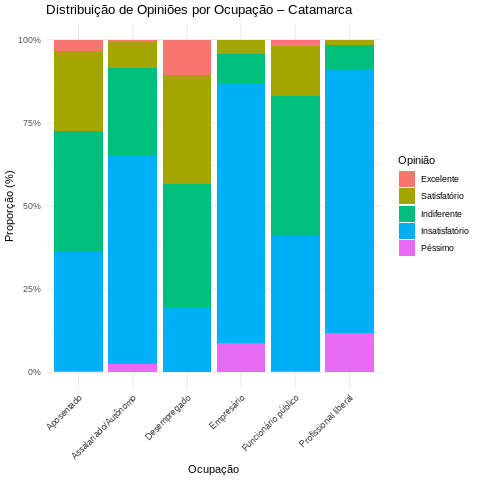

In [ ]:
%%R
dados_r <- subset(dados_1, Região == "Catamarca")
print(
  ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = percent_format()) +
    labs(title = "Distribuição de Opiniões por Ocupação – Catamarca",
         y = "Proporção (%)", x = "Ocupação") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

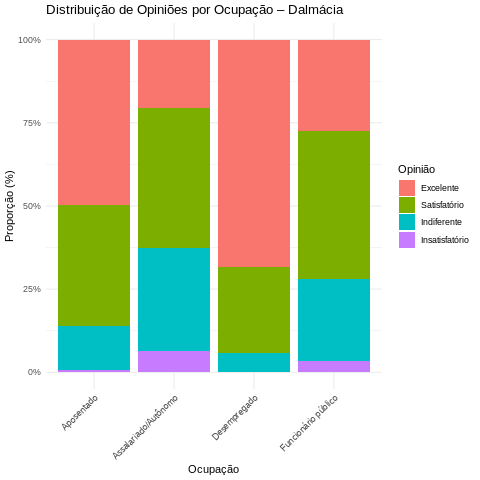

In [ ]:
%%R
dados_r <- subset(dados_1, Região == "Dalmácia")
print(
  ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = percent_format()) +
    labs(title = "Distribuição de Opiniões por Ocupação – Dalmácia",
         y = "Proporção (%)", x = "Ocupação") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

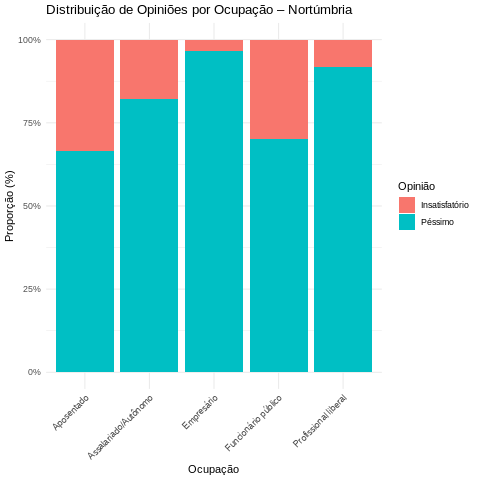

In [ ]:
%%R
dados_r <- subset(dados_1, Região == "Nortúmbria")
print(
  ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = percent_format()) +
    labs(title = "Distribuição de Opiniões por Ocupação – Nortúmbria",
         y = "Proporção (%)", x = "Ocupação") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

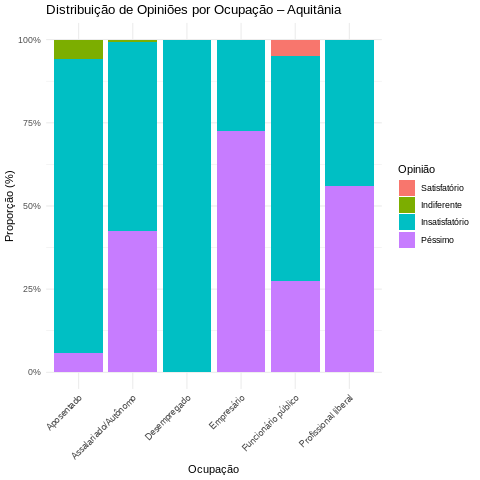

In [ ]:
%%R
dados_r <- subset(dados_1, Região == "Aquitânia")
print(
  ggplot(dados_r, aes(x = Ocupação, fill = Opinião)) +
    geom_bar(position = "fill") +
    scale_y_continuous(labels = percent_format()) +
    labs(title = "Distribuição de Opiniões por Ocupação – Aquitânia",
         y = "Proporção (%)", x = "Ocupação") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
)

                
                 Aquitânia Catamarca Dalmácia Nortúmbria Querétaro
  Excelente              0        83      917          0         0
  Satisfatório           2       545      593          0         0
  Indiferente            6      1275      240          0        60
  Insatisfatório       637      2119       28        167       869
  Péssimo              552        68        0       1448       246
                
                   Aquitânia   Catamarca    Dalmácia  Nortúmbria   Querétaro
  Excelente      0.000000000 0.020293399 0.515748031 0.000000000 0.000000000
  Satisfatório   0.001670844 0.133251834 0.333520810 0.000000000 0.000000000
  Indiferente    0.005012531 0.311735941 0.134983127 0.000000000 0.051063830
  Insatisfatório 0.532163743 0.518092910 0.015748031 0.103405573 0.739574468
  Péssimo        0.461152882 0.016625917 0.000000000 0.896594427 0.209361702


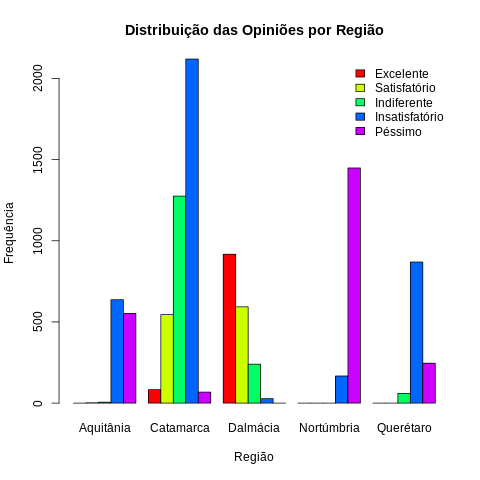

In [ ]:
# QUESTÃO 19 questao 19 - QUESTÃO 20 questao 20
%%R
# Cruzar “Opinião” e “Região” p/ ver se há diferenças regionais na avaliação
# do serviço público. A análise dos dados pode revelar desigualdades no
# atendimento entre diferentes partes de Pindorama.
# Tabela cruzando Opinião e Região
table_opiniao_regiao <- table(dados_1$Opinião, dados_1$Região)
print(table_opiniao_regiao)
freq_relativa <- prop.table(table_opiniao_regiao, margin = 2)
print(round(freq_relativa, 9))
barplot(table_opiniao_regiao,
        beside = TRUE,
        col = rainbow(nrow(table_opiniao_regiao)),
        legend = rownames(table_opiniao_regiao),
        main = "Distribuição das Opiniões por Região",
        xlab = "Região",
        ylab = "Frequência",
        args.legend = list(x = "topright", bty = "n"))
# Cruzar “Opinião” e “Renda” p/ ver se a percepção da qualidade do serviço
# varia de acordo com o nível socioeconômico. A análise dos dados pode indicar
# se há mais insatisfação entre camadas mais pobres ou mais ricas da população.
# Cria uma nova variável com faixas de renda
# dados_1$Faixa_Renda <- cut(dados_1$Renda,
#                            breaks = c(-Inf, 2, 5, Inf),
#                            labels = c("Até 2 SM", "2 a 5 SM", "Mais de 5 SM"),
#                            right = TRUE)
# table_opiniao_renda <- table(dados_1$Opinião, dados_1$Faixa_Renda)
# print(table_opiniao_renda)
# prop.table(table_opiniao_renda, margin = 2)
# library(ggplot2)
# table_opiniao_renda <- table(dados_1$Opinião, dados_1$Faixa_Renda)
# df_renda <- as.data.frame(table_opiniao_renda)
# colnames(df_renda) <- c("Opinião", "Faixa_Renda", "Frequência")
# ggplot(df_renda, aes(x = Faixa_Renda, y = Frequência, fill = Opinião)) +
#   geom_bar(stat = "identity") +
#   labs(title = "Distribuição da Opinião por Faixa de Renda",
#        x = "Faixa de Renda",
#        y = "Frequência") +
#   scale_fill_brewer(palette = "RdYlBu", direction = -1) +
#   theme_minimal()
# ggplot(df_renda, aes(x = Opinião, y = Frequência, fill = Faixa_Renda)) +
#   geom_bar(stat = "identity", position = "dodge") +
#   labs(title = "Opinião por Faixa de Renda",
#        x = "Opinião",
#        y = "Frequência") +
#   scale_fill_brewer(palette = "Set2") +
#   theme_minimal()
